In [64]:
import pandas as pd
import numpy as np
import inference
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
input_path = "/data/nfl/armchairanalysis/crewpool/joined.parquet"

In [3]:
df = pd.read_parquet(input_path)
df.head(5)

,gid,off,def,ptso,ptsd,time_elapsed_sec,seas,sprv,ou,home_dog,favorite,underdog,final_points_favorite,final_points_underdog,did_favorite_cover,current_points_favorite,current_points_underdog,current_points_underdog_with_spread,current_spread_difference
84060,519,NYG,SF,0,0,0,2002,-3.5,38.5,1,SF,NYG,16,13,0,0,0,3.5,-3.5
84061,519,NYG,SF,0,0,0,2002,-3.5,38.5,1,SF,NYG,16,13,0,0,0,3.5,-3.5
84062,519,NYG,SF,0,0,35,2002,-3.5,38.5,1,SF,NYG,16,13,0,0,0,3.5,-3.5
84063,519,NYG,SF,0,0,40,2002,-3.5,38.5,1,SF,NYG,16,13,0,0,0,3.5,-3.5
84064,519,NYG,SF,0,0,40,2002,-3.5,38.5,1,SF,NYG,16,13,0,0,0,3.5,-3.5


In [4]:
for_inference = df.drop(
    ['gid', 'seas', 'off', 'def', 'favorite', 'underdog', 'final_points_favorite', 
     'final_points_underdog', 'ptso', 'ptsd', 'ou', "did_favorite_cover",
     'current_points_underdog_with_spread'
    ]
    , axis=1)
for_inference.head(5)

,time_elapsed_sec,sprv,home_dog,current_points_favorite,current_points_underdog,current_spread_difference
84060,0,-3.5,1,0,0,-3.5
84061,0,-3.5,1,0,0,-3.5
84062,35,-3.5,1,0,0,-3.5
84063,40,-3.5,1,0,0,-3.5
84064,40,-3.5,1,0,0,-3.5


In [5]:
MODEL_PATH = 'model/model.h5'
SCALER_PATH = 'model/scaler.pkl'

model = inference.load_model(MODEL_PATH)
scaler = inference.load_scaler(SCALER_PATH)

In [6]:
scaled = scaler.transform(for_inference)
print(scaled.shape)
pd.DataFrame(scaled).head(5)

(568306, 6)


,0,1,2,3,4,5
0,-1.762735,-1.038608,1.461786,-1.16769,-1.049051,-0.103136
1,-1.762735,-1.038608,1.461786,-1.16769,-1.049051,-0.103136
2,-1.729607,-1.038608,1.461786,-1.16769,-1.049051,-0.103136
3,-1.724874,-1.038608,1.461786,-1.16769,-1.049051,-0.103136
4,-1.724874,-1.038608,1.461786,-1.16769,-1.049051,-0.103136


In [7]:
predictions = model.predict(scaled)
print(predictions.shape)
pd.DataFrame(predictions).head(5)

(568306, 1)


,0
0,0.484616
1,0.484616
2,0.484979
3,0.485030
4,0.485030


In [8]:
df['cover_prob'] = predictions
df['prediction'] = predictions > 0.5
df['time_elapsed_min'] = np.floor(df['time_elapsed_sec'] / 60)
df['predicted_correctly'] = (df["did_favorite_cover"]  == df.prediction.astype(int)).astype(int)
df.sample(10)

,gid,off,def,ptso,ptsd,time_elapsed_sec,seas,sprv,ou,home_dog,...,final_points_underdog,did_favorite_cover,current_points_favorite,current_points_underdog,current_points_underdog_with_spread,current_spread_difference,cover_prob,prediction,time_elapsed_min,predicted_correctly
240115,1473,BUF,SD,3,28,1710,2005,10.5,42.5,0,...,10,1,28,3,13.5,14.5,0.947201,True,28.0,1
474870,2924,IND,HOU,0,34,2909,2011,8.5,43.0,0,...,7,1,34,0,8.5,25.5,0.999997,True,48.0,1
382250,2355,OAK,HOU,0,0,38,2008,-7.0,43.0,1,...,27,0,0,0,7.0,-7.0,0.457300,False,0.0,1
159829,979,BUF,NYJ,17,6,3163,2003,3.0,36.0,0,...,6,1,17,6,9.0,8.0,0.910462,True,52.0,1
179955,1104,GB,NYG,7,7,2246,2004,7.0,44.0,0,...,14,0,7,7,14.0,-7.0,0.197314,False,37.0,1
490733,3020,KC,OAK,21,0,2349,2011,4.0,40.5,0,...,28,0,0,21,25.0,-25.0,0.001777,False,39.0,1
460589,2836,DEN,KC,3,10,2531,2010,9.0,48.5,0,...,6,0,10,3,12.0,-2.0,0.525593,True,42.0,0
514210,3162,WAS,PHI,10,34,3571,2011,8.0,45.5,0,...,10,1,34,10,18.0,16.0,0.999924,True,59.0,1
523316,3217,MIA,OAK,14,10,2420,2012,-2.5,39.0,1,...,35,0,10,14,16.5,-6.5,0.279497,False,40.0,1
260957,1601,MIN,WAS,6,3,1007,2006,4.5,35.0,0,...,19,0,3,6,10.5,-7.5,0.360444,False,16.0,1


In [9]:
grouped = df.groupby("time_elapsed_min").agg(total_correct=('predicted_correctly', 'sum'), total_games=('predicted_correctly', 'count'),)
grouped['prediction_accuracy'] = grouped['total_correct'] / grouped['total_games']
grouped.head(10)

,total_correct,total_games,prediction_accuracy
time_elapsed_min,,,
0.0,6578,12467,0.527633
1.0,4212,7821,0.538550
2.0,4393,8099,0.542413
3.0,4656,8295,0.561302
4.0,4903,8486,0.577775
5.0,5064,8634,0.586518
6.0,5045,8450,0.597041
7.0,5118,8440,0.606398
8.0,5183,8402,0.616877


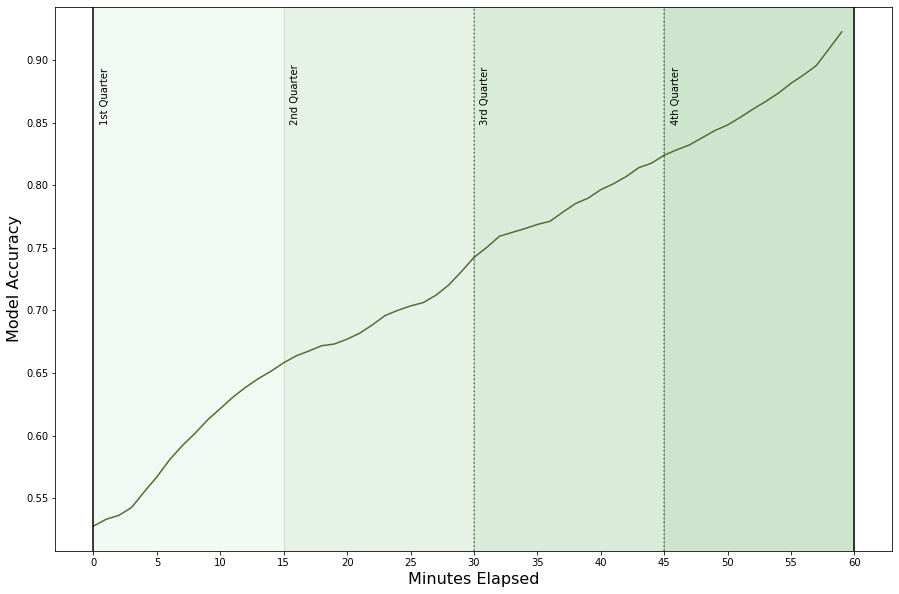

In [81]:
# plt.figure(figsize=(15,110))
to_plot = grouped[grouped.index < 60]  # Overtime has crazy results
to_plot = to_plot[['prediction_accuracy']].rolling(4, min_periods=1).mean()  # Run moving average


plt.figure(figsize=(15, 10))
plt.rc('axes', labelsize=16) # Increase font for axis labels
plt.plot(to_plot, color='darkolivegreen')
plt.xlabel("Minutes Elapsed")
plt.ylabel("Model Accuracy")

# Add lines for each quarter
plt.axvline(x=0, color='k',)
plt.axvline(x=15, linestyle='', color='k',)
plt.axvline(x=30, linestyle=':', color='k', alpha=0.50)
plt.axvline(x=45, linestyle=':', color='k', alpha=0.50)
plt.axvline(x=60, color='k',)

# Background colors for sections
background_color = "green"
plt.axvspan(0, 15, alpha=0.05, color=background_color)
plt.axvspan(15, 30, alpha=0.10, color=background_color, label='q1')
plt.axvspan(30, 45, alpha=0.15, color=background_color)
plt.axvspan(45, 60, alpha=0.20, color=background_color)

plt.xticks(np.arange(0, 65, 5)) # Add ticks every 5 min


plt.text(0.5, .85, '1st Quarter', rotation=90)
plt.text(15.5, .85, '2nd Quarter', rotation=90)
plt.text(30.5, .85, '3rd Quarter', rotation=90)
plt.text(45.5, .85, '4th Quarter', rotation=90)

plt.show()